In [1]:
from keras import layers, models
from keras.datasets import imdb

2024-06-05 19:55:05.162692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 19:55:07.119444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-05 19:55:07.119516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-05 19:55:07.210733: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 19:55:08.292772: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [6]:
import numpy as np

In [7]:
def vectorization(data, dim = 10000):
    res = np.zeros(shape = (len(data), dim))
    for i in range(len(data)):
        for j in data[i]:
            res[i][j] = 1
    return res

In [8]:
x_train = vectorization(x_train, dim = 10000)

In [9]:
x_test = vectorization(x_test, dim = 10000)

In [10]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [11]:
y_train = np.asarray(y_train).astype('float64')

In [12]:
type(x_train)

numpy.ndarray

In [13]:
type(x_train[0][0])

numpy.float64

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary(

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [31]:
hist = model.fit(x_train, y_train, epochs = 4, validation_split = 0.2)

Epoch 1/4


2024-06-05 20:03:05.586861: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 800000000 exceeds 10% of free system memory.


625/625 [==============================] - 3s 3ms/step - loss: 0.3352 - acc: 0.8643 - val_loss: 0.2773 - val_acc: 0.8934
Epoch 2/4
625/625 [==============================] - 2s 3ms/step - loss: 0.2073 - acc: 0.9194 - val_loss: 0.2830 - val_acc: 0.8914
Epoch 3/4
625/625 [==============================] - 2s 3ms/step - loss: 0.1729 - acc: 0.9362 - val_loss: 0.3328 - val_acc: 0.8868
Epoch 4/4
625/625 [==============================] - 3s 4ms/step - loss: 0.1490 - acc: 0.9448 - val_loss: 0.3247 - val_acc: 0.8852


In [32]:
history = hist.history

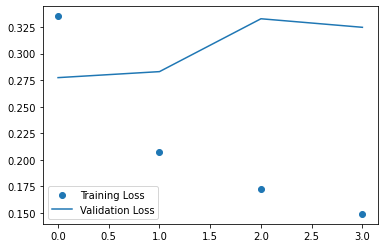

In [33]:
import matplotlib.pyplot as plt
plt.scatter(range(len(history['loss'])), history['loss'], label = 'Training Loss')
plt.plot(range(len(history['val_loss'])), history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

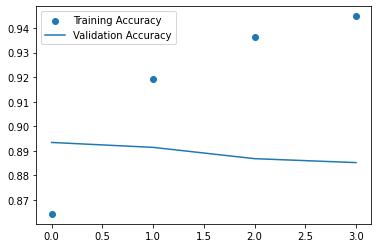

In [34]:
plt.scatter(range(len(history['acc'])), history['acc'], label = 'Training Accuracy')
plt.plot(range(len(history['val_acc'])), history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()